In [322]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [323]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [324]:
df.describe().applymap(lambda x: f"{x:0.0f}")

,value
count,1304
mean,67221
std,59340
min,1201
25%,35758
50%,57198
75%,83883
max,1173655


In [325]:
print((df['value'] <= df['value'].quantile(.975)).sum())
filterTop = (df['value'] <= df['value'].quantile(.975))
filterTop

1271


date
2016-05-09     True
2016-05-10     True
2016-05-11     True
2016-05-12     True
2016-05-13     True
              ...  
2019-11-29     True
2019-11-30     True
2019-12-01     True
2019-12-02    False
2019-12-03     True
Name: value, Length: 1304, dtype: bool

In [326]:
print((df['value'] >= df['value'].quantile(.025)).sum())
filterBottom = df['value'] >= df['value'].quantile(.025)
filterBottom

1271


date
2016-05-09    False
2016-05-10    False
2016-05-11    False
2016-05-12    False
2016-05-13    False
              ...  
2019-11-29     True
2019-11-30     True
2019-12-01     True
2019-12-02     True
2019-12-03     True
Name: value, Length: 1304, dtype: bool

In [327]:
(filterTop & filterBottom).sum()

1238

In [328]:
df_filtered = df[filterTop & filterBottom]
df_filtered.describe().applymap(lambda x: f"{x:0.0f}")

,value
count,1238
mean,63060
std,31675
min,18060
25%,37244
50%,57198
75%,81646
max,177588


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

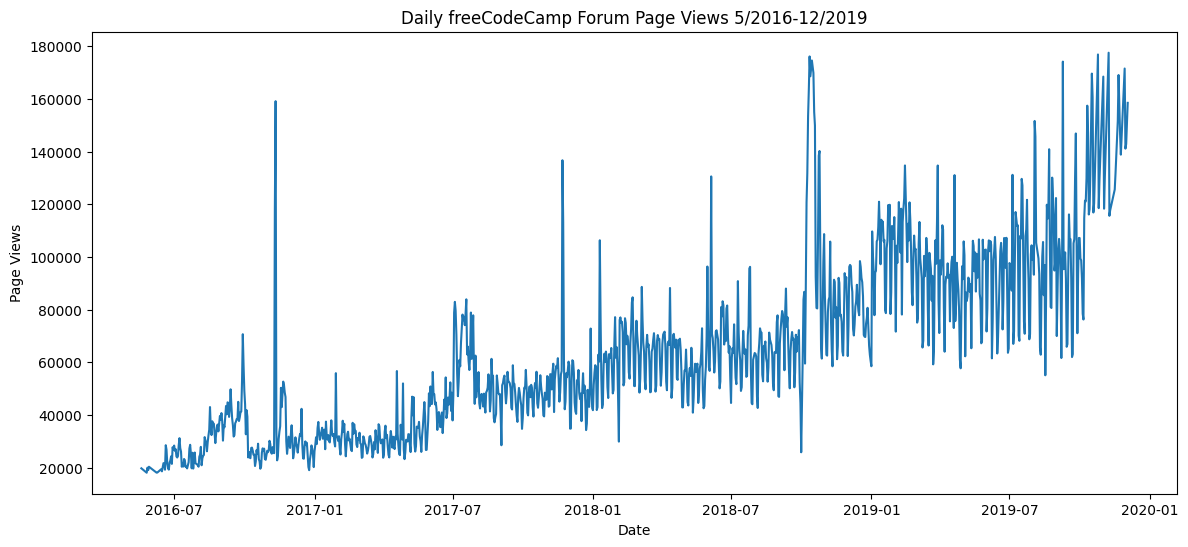

In [329]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(df_filtered,linestyle='solid',markersize=0 )
plt.ylabel('Page Views')
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')


In [330]:
df_filtered

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [331]:
df_filtered.index

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1238, freq=None)

In [332]:
# pd.DatetimeIndex(df_filtered.index).month
df_filtered.index.month

Int64Index([ 5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 12, 12],
           dtype='int64', name='date', length=1238)

In [347]:
# df_filtered['year'] = pd.DatetimeIndex(df_filtered.index).year
# df_filtered['month'] = pd.DatetimeIndex(df_filtered.index).month
df_bar = df_filtered.copy()
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year

In [348]:
# df_bar.groupby(['year','month'])['value'].mean()
df_bar_grouped = df_bar.groupby(['year','month']).mean()

In [349]:
# print(type(df_bar_grouped.unstack()))
# print(df_bar_grouped.columns)
# df_bar_grouped.unstack()

In [350]:
df_bar_grouped = df_bar_grouped.reset_index(drop=False)

In [351]:
df_bar_grouped

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [344]:
df_bar_grouped['month_name'] = pd.to_datetime(df_bar_grouped['month'], format='%m').dt.month_name()

In [508]:
# df_bar_grouped = df_bar_grouped.reset_index(drop=False)
# sns.barplot(data=df_bar_grouped,x='year', y='value',hue='month')
month_order = ['January', 'February', 'March', 'April','May','June','July','August','September', 'October', 'November', 'December']
catplot = sns.catplot(data=df_bar_grouped,kind='bar',x='year', y='value',hue='month_name', palette='Spectral', hue_order=month_order)
catplot.set(xlabel='Years',ylabel='Average Page Views')
# plt.legend(title='Month')
legend = catplot._legend
legend.set_title('Months')



ValueError: Could not interpret input 'month_name'

In [509]:
df_box = df_filtered.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [510]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


<AxesSubplot: xlabel='year', ylabel='value'>

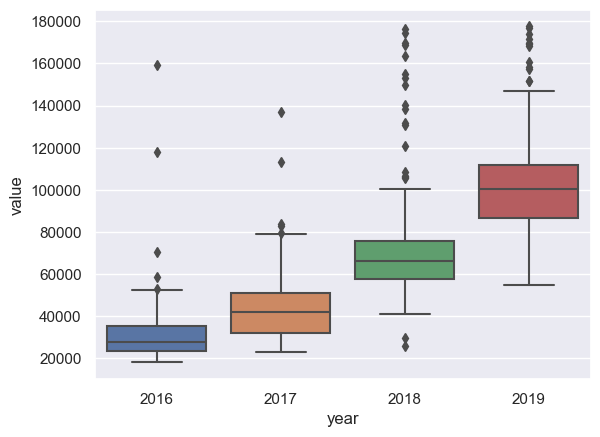

In [511]:
sns.boxplot(x=df_box['year'], y=df_box['value'])

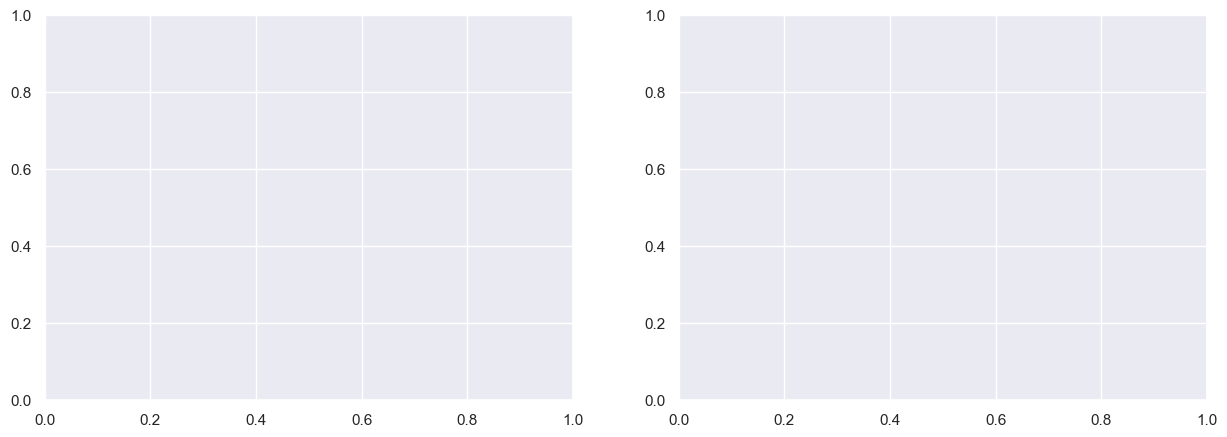

In [512]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
# sns.set()

In [520]:
year_box_plot = sns.boxplot(
    data=df_box,
    x='year',
    y='value',
    fliersize=1.5,
    flierprops=dict(marker='o'),
    saturation=.85,
    linewidth=.5,
    ax = ax[0]
).set(
    xlabel='Year',
    ylabel='Page Views',
    title='Year-wise Box Plot (Trend)'
)

In [525]:
month_order = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_box_plot = sns.boxplot(
    data=df_box,
    x='month',
    y='value',
    fliersize=1.5,
    flierprops=dict(marker='o'),
    saturation=.85,
    linewidth=.5,
    order=month_order,
    ax = ax[1]
).set(
    xlabel='Month',
    ylabel='Page Views',
    title='Month-wise Box Plot (Trend)'
)
# month_box_plot.set(xlabel='Months', y_label='Page Views')

In [526]:
# # dir(ax[0])
# # ax[0].patch.set_linewidth(0)
# # ax[0].patch.set_edgecolor('')
# # dir(ax[0].spines)
# dir(ax[0].spines['right'])
# # ax[0].spines['right'].set_linewidth(.1)
# for _,s in ax[0].spines.items():
#     print(_,s)
#     s.set_linewidth(1)
# for _,s in ax[1].spines.items():
#     print(_,s)
#     s.set_linewidth(.15)

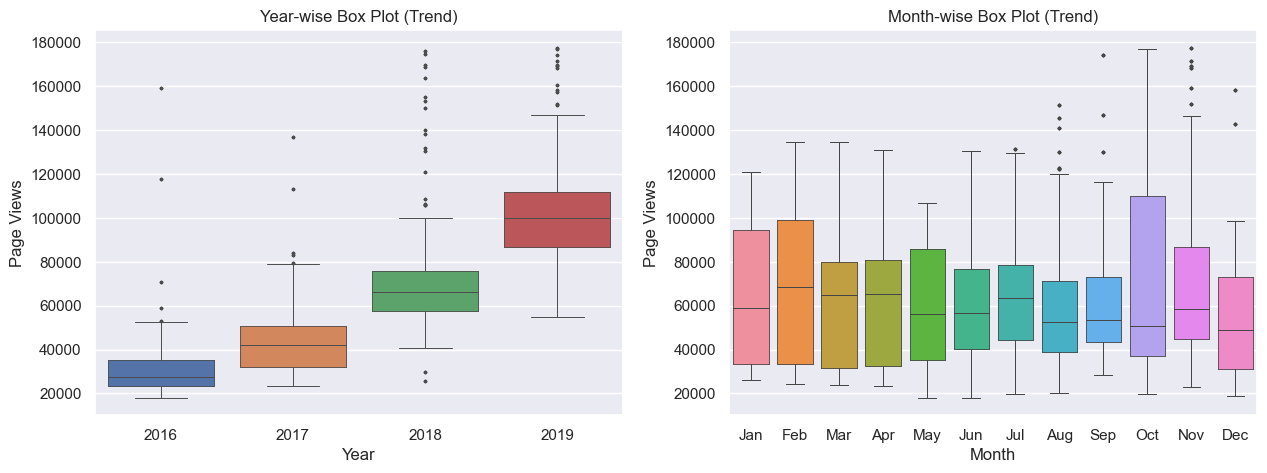

In [527]:
fig